In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('data/LH/R13296617_SL140.csv')

In [3]:
df.shape

(12, 88)

In [4]:
df.head

<bound method NDFrame.head of       Geo_FIPS           Geo_GEOID              Geo_NAME  \
0   6037199110  14000US06037199110  Census Tract 1991.10   
1   6037199120  14000US06037199120  Census Tract 1991.20   
2   6037199201  14000US06037199201  Census Tract 1992.01   
3   6037199202  14000US06037199202  Census Tract 1992.02   
4   6037199300  14000US06037199300     Census Tract 1993   
5   6037199400  14000US06037199400     Census Tract 1994   
6   6037199700  14000US06037199700     Census Tract 1997   
7   6037199900  14000US06037199900     Census Tract 1999   
8   6037203500  14000US06037203500     Census Tract 2035   
9   6037206010  14000US06037206010  Census Tract 2060.10   
10  6037206020  14000US06037206020  Census Tract 2060.20   
11  6037980010  14000US06037980010  Census Tract 9800.10   

                                            Geo_QName Geo_STUSAB  Geo_SUMLEV  \
0   Census Tract 1991.10, Los Angeles County, Cali...         ca         140   
1   Census Tract 1991.20, Los

In [5]:
df.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
11,6037980010,14000US06037980010,Census Tract 9800.10,"Census Tract 9800.10, Los Angeles County, Cali...",ca,140,0,ACSSF,6197,NaN,...,0.0,8.93,0.0,0.0,0.0,0.0,7.14,7.14,0.0,7.14


In [6]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           12 non-null     int64  
 1   Geo_GEOID          12 non-null     object 
 2   Geo_NAME           12 non-null     object 
 3   Geo_QName          12 non-null     object 
 4   Geo_STUSAB         12 non-null     object 
 5   Geo_SUMLEV         12 non-null     int64  
 6   Geo_GEOCOMP        12 non-null     int64  
 7   Geo_FILEID         12 non-null     object 
 8   Geo_LOGRECNO       12 non-null     int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          12 non-null     int64  
 14  Geo_COUNTY         12 non-null     int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non-nul

In [7]:
df.Geo_FIPS.head()

0    6037199110
1    6037199120
2    6037199201
3    6037199202
4    6037199300
Name: Geo_FIPS, dtype: int64

In [8]:
# Have to conver the FIPS code into strings
df = pd.read_csv(
    'data/LH/R13296617_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [9]:
df.Geo_FIPS.head()

0    06037199110
1    06037199120
2    06037199201
3    06037199202
4    06037199300
Name: Geo_FIPS, dtype: object

In [10]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [11]:
df=df.dropna(axis=1,how="all")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           12 non-null     object 
 1   Geo_GEOID          12 non-null     object 
 2   Geo_NAME           12 non-null     object 
 3   Geo_QName          12 non-null     object 
 4   Geo_STUSAB         12 non-null     object 
 5   Geo_SUMLEV         12 non-null     int64  
 6   Geo_GEOCOMP        12 non-null     int64  
 7   Geo_FILEID         12 non-null     object 
 8   Geo_LOGRECNO       12 non-null     int64  
 9   Geo_STATE          12 non-null     object 
 10  Geo_COUNTY         12 non-null     object 
 11  Geo_TRACT          12 non-null     int64  
 12  SE_A14001_001      12 non-null     int64  
 13  SE_A14001_002      12 non-null     int64  
 14  SE_A14001_003      12 non-null     int64  
 15  SE_A14001_004      12 non-null     int64  
 16  SE_A14001_005      12 non-nu

In [13]:
df.columns 

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_TRACT', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [14]:
# Define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

In [15]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       12 non-null     object
 1   SE_A14001_002  12 non-null     int64 
 2   SE_A14001_003  12 non-null     int64 
 3   SE_A14001_004  12 non-null     int64 
 4   SE_A14001_005  12 non-null     int64 
 5   SE_A14001_006  12 non-null     int64 
 6   SE_A14001_007  12 non-null     int64 
 7   SE_A14001_008  12 non-null     int64 
 8   SE_A14001_009  12 non-null     int64 
 9   SE_A14001_010  12 non-null     int64 
 10  SE_A14001_011  12 non-null     int64 
 11  SE_A14001_012  12 non-null     int64 
 12  SE_A14001_013  12 non-null     int64 
 13  SE_A14001_014  12 non-null     int64 
 14  SE_A14001_015  12 non-null     int64 
 15  SE_A14001_016  12 non-null     int64 
 16  SE_A14001_017  12 non-null     int64 
dtypes: int64(16), object(1)
memory usage: 1.7+ KB


In [16]:
# Rename the columns 
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [17]:
df2.columns = ['FIPS',               
'Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [18]:
# Making sure the data works 
df2.head(10)

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037199110,43,27,45,18,41,38,64,29,9,62,91,65,108,16,44,37
1,06037199120,82,121,83,71,92,26,127,68,13,83,98,79,35,49,56,32
2,06037199201,89,100,79,75,97,123,34,44,60,96,93,111,28,28,17,15
3,06037199202,80,30,31,32,38,22,33,29,23,110,98,91,112,109,51,34
4,06037199300,100,6,141,41,13,13,75,31,11,115,84,74,147,44,116,304
5,06037199400,126,41,112,96,39,118,66,89,60,145,120,67,86,92,64,44
6,06037199700,129,129,8,70,41,119,61,40,55,77,61,156,33,75,54,23
7,06037199900,89,42,72,23,46,42,91,36,24,67,67,92,29,14,34,10
8,06037203500,98,109,34,25,103,67,6,52,91,72,75,70,54,16,34,30
9,06037206010,55,173,142,47,0,82,78,80,33,78,23,202,96,25,54,90


In [19]:
# Doing some stats 
df2.mean()

FIPS                  5.030999e+129
Less than $10,000      7.675000e+01
$10,000-$14,999        6.525000e+01
$15,000-$19,999        6.375000e+01
$20,000-$24,999        4.200000e+01
$25,000-$29,999        4.250000e+01
$30,000-$34,999        5.441667e+01
$35,000-$39,999        5.291667e+01
$40,000-$44,999        4.275000e+01
$45,000-$49,999        3.233333e+01
$50,000-$59,999        7.650000e+01
$60,000-$74,999        7.141667e+01
$75,000-$99,999        8.733333e+01
$100,000-$124,999      6.650000e+01
$125,000-$149,999      4.216667e+01
$150,000-$199,999      4.775000e+01
More than $200,000     5.233333e+01
dtype: float64

In [20]:
df2.median()

FIPS                  6.037200e+09
Less than $10,000     8.550000e+01
$10,000-$14,999       4.150000e+01
$15,000-$19,999       5.850000e+01
$20,000-$24,999       3.650000e+01
$25,000-$29,999       4.000000e+01
$30,000-$34,999       4.000000e+01
$35,000-$39,999       6.250000e+01
$40,000-$44,999       3.800000e+01
$45,000-$49,999       2.350000e+01
$50,000-$59,999       7.750000e+01
$60,000-$74,999       7.950000e+01
$75,000-$99,999       7.650000e+01
$100,000-$124,999     6.000000e+01
$125,000-$149,999     3.100000e+01
$150,000-$199,999     5.000000e+01
More than $200,000    3.100000e+01
dtype: float64

In [21]:
df2['Less than $10,000'].mean()

76.75

In [22]:
df2.describe()

,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,76.750000,65.250000,63.750000,42.000000,42.500000,54.416667,52.916667,42.750000,32.333333,76.500000,71.416667,87.333333,66.500000,42.166667,47.750000,52.333333
std,37.810833,58.103552,49.091982,30.214385,37.439648,46.160704,39.278628,25.793322,27.971847,40.369881,34.328515,51.955109,43.263463,33.384355,28.120277,82.534107
min,14.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,4.000000
25%,52.000000,21.750000,26.000000,21.750000,9.750000,19.750000,26.250000,29.000000,10.500000,65.750000,57.500000,66.500000,32.000000,16.000000,34.000000,13.750000
50%,85.500000,41.500000,58.500000,36.500000,40.000000,40.000000,62.500000,38.000000,23.500000,77.500000,79.500000,76.500000,60.000000,31.000000,50.000000,31.000000
75%,98.500000,112.000000,90.250000,70.250000,57.500000,91.000000,75.750000,56.000000,56.250000,99.500000,94.250000,96.750000,99.000000,55.500000,54.500000,38.750000
max,129.000000,173.000000,142.000000,96.000000,103.000000,123.000000,127.000000,89.000000,91.000000,145.000000,120.000000,202.000000,147.000000,109.000000,116.000000,304.000000


<AxesSubplot: title={'center': 'Lincoln Heights'}>

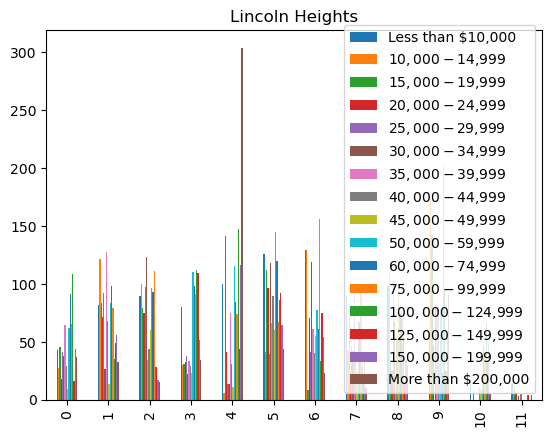

In [23]:
df2.plot.bar(title = "Lincoln Heights")

In [24]:
# Want to create a total households population
df3 = ['Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [25]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_564/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop
0,06037199110,43,27,45,18,41,38,64,29,9,62,91,65,108,16,44,37,737
1,06037199120,82,121,83,71,92,26,127,68,13,83,98,79,35,49,56,32,1115
2,06037199201,89,100,79,75,97,123,34,44,60,96,93,111,28,28,17,15,1089


In [26]:
# Notice that the SE_A14001_001 is household number of resondents by census tract
df3 = pd.read_csv("data/BH/R13296587_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,6037203100,14000US06037203100,Census Tract 2031,"Census Tract 2031, Los Angeles County, California",ca,140,0,ACSSF,4378,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1239,156,141,96,44,101,107,85,33,38,93,96,126,55,34,21,13,12.59,11.38,7.75,3.55,8.15,8.64,6.86,2.66,3.07,7.51,7.75,10.17,4.44,2.74,1.69,1.05
1,6037203200,14000US06037203200,Census Tract 2032,"Census Tract 2032, Los Angeles County, California",ca,140,0,ACSSF,4379,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321,76,66,75,89,62,31,75,45,54,110,140,192,98,33,114,61,5.75,5.00,5.68,6.74,4.69,2.35,5.68,3.41,4.09,8.33,10.60,14.53,7.42,2.50,8.63,4.62
2,6037203300,14000US06037203300,Census Tract 2033,"Census Tract 2033, Los Angeles County, California",ca,140,0,ACSSF,4380,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405,23,72,10,18,19,40,21,59,13,28,34,15,38,7,8,0,5.68,17.78,2.47,4.44,4.69,9.88,5.19,14.57,3.21,6.91,8.40,3.70,9.38,1.73,1.98,0.00
3,6037203500,14000US06037203500,Census Tract 2035,"Census Tract 2035, Los Angeles County, California",ca,140,0,ACSSF,4381,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,936,98,109,34,25,103,67,6,52,91,72,75,70,54,16,34,30,10.47,11.65,3.63,2.67,11.00,7.16,0.64,5.56,9.72,7.69,8.01,7.48,5.77,1.71,3.63,3.21
4,6037203710,14000US06037203710,Census Tract 2037.10,"Census Tract 2037.10, Los Angeles County, Cali...",ca,140,0,ACSSF,4383,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799,55,2,32,55,30,35,121,43,36,86,91,132,56,0,0,25,6.88,0.25,4.01,6.88,3.75,4.38,15.14,5.38,4.51,10.76,11.39,16.52,7.01,0.00,0.00,3.13


In [27]:
df_householdsize = df3['SE_A14001_001']
df_householdsize.sample(10)

6     1143
12     627
16    1245
23     805
11    1302
2      405
22     297
5     1054
18     944
14    1208
Name: SE_A14001_001, dtype: int64

In [28]:
df_householdsize.describe()

count      24.00000
mean      907.87500
std       285.09393
min       297.00000
25%       744.25000
50%       940.00000
75%      1159.25000
max      1321.00000
Name: SE_A14001_001, dtype: float64

In [29]:
# Creating a poverty column variable 
df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_564/3305094393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty
9,06037206010,55,173,142,47,0,82,78,80,33,78,23,202,96,25,54,90,1258,417
3,06037199202,80,30,31,32,38,22,33,29,23,110,98,91,112,109,51,34,923,173
7,06037199900,89,42,72,23,46,42,91,36,24,67,67,92,29,14,34,10,778,226
1,06037199120,82,121,83,71,92,26,127,68,13,83,98,79,35,49,56,32,1115,357
6,06037199700,129,129,8,70,41,119,61,40,55,77,61,156,33,75,54,23,1131,336


In [30]:
#Creating a poverty and total population to get a percent 
df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(10)

/tmp/ipykernel_564/3666134208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
2,06037199201,89,100,79,75,97,123,34,44,60,96,93,111,28,28,17,15,1089,343,31.496786
5,06037199400,126,41,112,96,39,118,66,89,60,145,120,67,86,92,64,44,1365,375,27.472527
10,06037206020,16,0,7,0,0,0,0,10,9,13,47,41,66,34,49,5,297,23,7.744108
1,06037199120,82,121,83,71,92,26,127,68,13,83,98,79,35,49,56,32,1115,357,32.017937
9,06037206010,55,173,142,47,0,82,78,80,33,78,23,202,96,25,54,90,1258,417,33.147854
4,06037199300,100,6,141,41,13,13,75,31,11,115,84,74,147,44,116,304,1315,288,21.901141
8,06037203500,98,109,34,25,103,67,6,52,91,72,75,70,54,16,34,30,936,266,28.418803
0,06037199110,43,27,45,18,41,38,64,29,9,62,91,65,108,16,44,37,737,133,18.046133
7,06037199900,89,42,72,23,46,42,91,36,24,67,67,92,29,14,34,10,778,226,29.048843
6,06037199700,129,129,8,70,41,119,61,40,55,77,61,156,33,75,54,23,1131,336,29.708223


<AxesSubplot: ylabel='Frequency'>

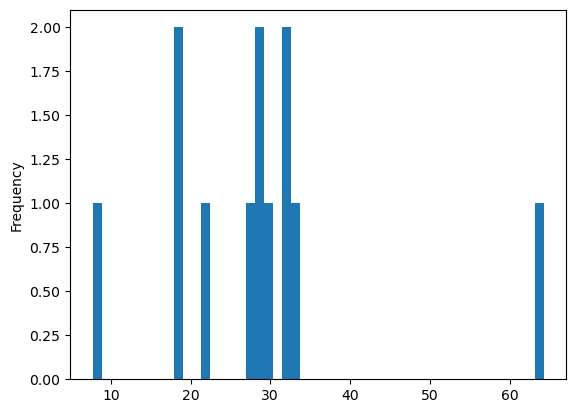

In [31]:
df2['p_poverty'].plot.hist(bins=50)

In [32]:
# top 10 census of households income that live in poverty. 
df_sorted = df2.sort_values(by='p_poverty',ascending = False)
df_sorted[['FIPS','p_poverty']].head(10)

,FIPS,p_poverty
11,06037980010,64.285714
9,06037206010,33.147854
1,06037199120,32.017937
2,06037199201,31.496786
6,06037199700,29.708223
7,06037199900,29.048843
8,06037203500,28.418803
5,06037199400,27.472527
4,06037199300,21.901141
3,06037199202,18.743229


<AxesSubplot: xlabel='FIPS'>

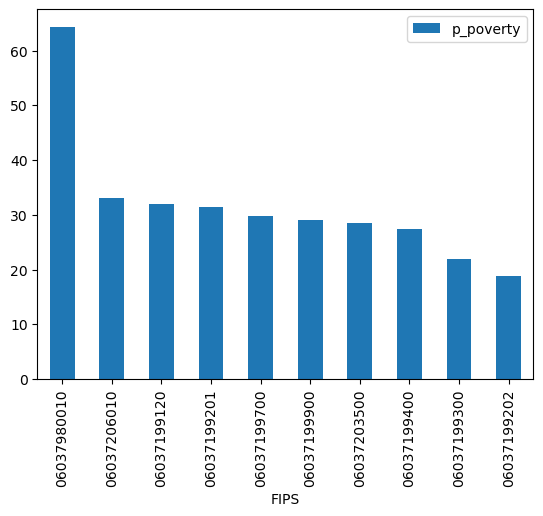

In [33]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='p_poverty')

<AxesSubplot: title={'center': 'Census Tract where Lincoln Heights has more poverty'}, ylabel='FIPS'>

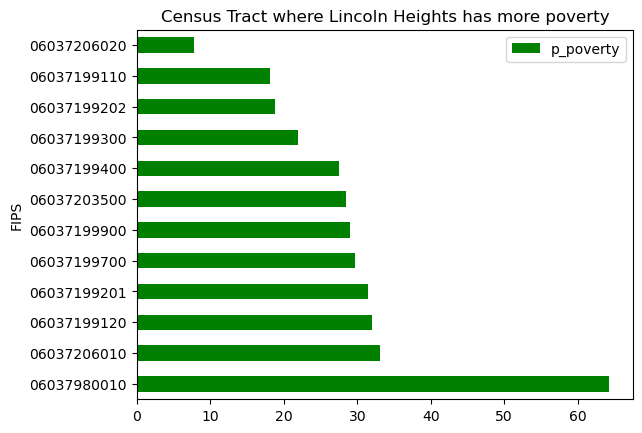

In [41]:
df_sorted.head(30).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='p_poverty', 
                            title='Census Tract where Lincoln Heights has more poverty',
                            color='Green')

In [40]:
# Import geojson file of LA County
tracts=gpd.read_file('data/LH/Census_Tracts_2020.geojson')
tracts.head(2)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."


In [36]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [37]:
tracts=tracts.merge(df2, on="FIPS")

In [38]:
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
0,533,199110,1991.10,9.708509e+06,14255.807623,"POLYGON ((-118.19147 34.08377, -118.19241 34.0...",06037199110,43,27,45,18,41,38,64,29,9,62,91,65,108,16,44,37,737,133,18.046133
1,534,199120,1991.20,1.035336e+07,16463.991792,"POLYGON ((-118.19632 34.06564, -118.19632 34.0...",06037199120,82,121,83,71,92,26,127,68,13,83,98,79,35,49,56,32,1115,357,32.017937
2,535,199201,1992.01,4.253709e+06,8935.660564,"POLYGON ((-118.21380 34.07925, -118.21448 34.0...",06037199201,89,100,79,75,97,123,34,44,60,96,93,111,28,28,17,15,1089,343,31.496786


<AxesSubplot: >

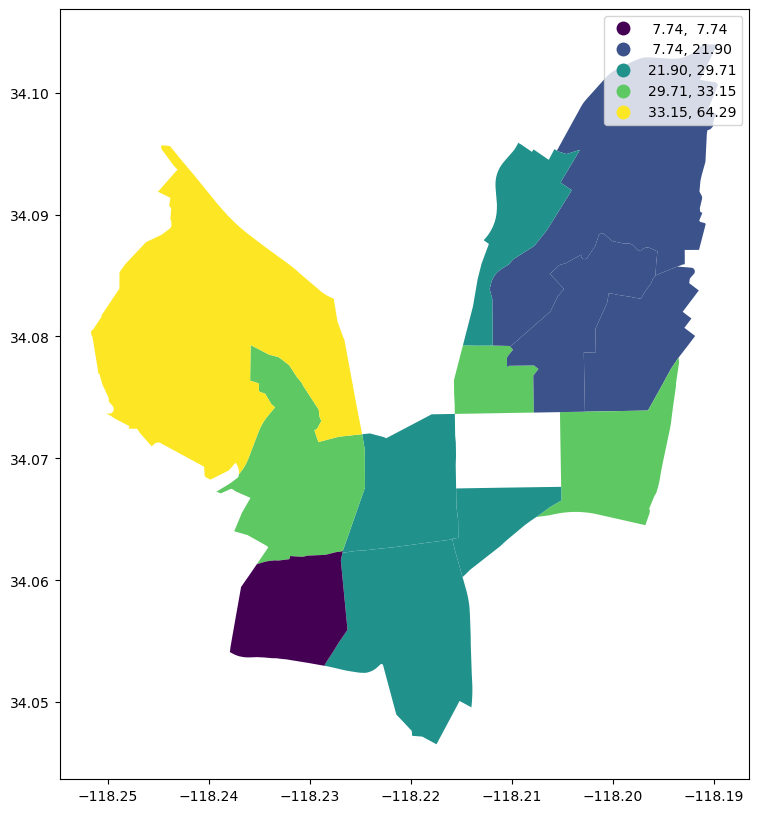

In [39]:
# scheme='NaturalBreaks'
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')